## Research Question:
Is there a significant relationship between the modes of transportation individuals choose for daily commute to the university campus and their occupation? Khattak et al. (2011) stated that the mobility patterns of university students are not well represented or understood because of the difficulty of getting information from students that might be segregated from the general public. The study aims to understand students' mobility patterns by collecting data on university campus during term time and capturing various transportation modes used by respondents.

## Hypothesis:
There is a significant relationship between the modes of transportation chosen by individual in the university campus and their occupation.

## Null Hypothesis:
There is no significant relationship between the modes of transportation chosen by individuals in the university campus and their occupation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

Load the survey dataset using pandas

In [2]:
df = pd.read_excel('Questionnaire_data_rail_stream.xlsx') 

In [3]:
df

,Unnamed: 0,enter survey number here,time of survey,"yes=1, no=0 (yes means box has been ticked)",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,"yes=1, no=0.3",Unnamed: 33,Unnamed: 34,Unnamed: 35,"yes=1, no=0.4",Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,Surveyno,time,Q1a,Q1b,Q1c,Q1d,Q1e,Q1f,Q1g,...,Q18a,Q18b,Q18c,Q18d,Q19a,Q19b,Q19c,Q19d,Q19e,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Example,G10112,18:32:00,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,NaN
3,1,G40101,09:31:00,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,NaN
4,2,G40102,09:33:00,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,368,G140104,14:30:00,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,NaN
367,369,G140508,14:30:00,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,NaN
368,370,G140507,14:30:00,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,NaN
369,371,G140101,14:30:00,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,NaN


## DATA CLEANING

Display a list of all the columns

In [4]:
list(df.columns)

['Unnamed: 0',
 'enter survey number here',
 'time of survey',
 'yes=1, no=0 (yes means box has been ticked)',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'text',
 'yes=1, no=0',
 'Unnamed: 14',
 'Unnamed: 15',
 'give number of ranking (1 - strongly agree to 5 - strongly disagree)',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'yes=1, no=0.1',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'yes=1, no=0.2',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Text',
 'yes=1, no=0.3',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'yes=1, no=0.4',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41']

Rename the columns 

In [5]:
df = df.rename(columns={'Unnamed: 0': 'S/N', 'enter survey number here': 'Survey_No', 'yes=1, no=0 (yes means box has been ticked)': 'car_as_driver', 'Unnamed: 4': 'Bus', 'Unnamed: 5': 'Train', 'Unnamed: 6': 'car_as_passenger', 'Unnamed: 7': 'Bicycle', 'Unnamed: 8': 'Walking', 'Unnamed: 9': 'Taxi', 'Unnamed: 10':'Uber', 'Unnamed: 11': 'Other_Transport', 'yes=1, no=0.2': 'Students', 'Unnamed: 27':'University_employee', 'Unnamed: 28': 'Employee_not_univerity', 'Unnamed: 29': 'Retired', 'Unnamed: 30': 'Other_Occupation'})

In [6]:
df

,S/N,Survey_No,time of survey,car_as_driver,Bus,Train,car_as_passenger,Bicycle,Walking,Taxi,...,"yes=1, no=0.3",Unnamed: 33,Unnamed: 34,Unnamed: 35,"yes=1, no=0.4",Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,Surveyno,time,Q1a,Q1b,Q1c,Q1d,Q1e,Q1f,Q1g,...,Q18a,Q18b,Q18c,Q18d,Q19a,Q19b,Q19c,Q19d,Q19e,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Example,G10112,18:32:00,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,NaN
3,1,G40101,09:31:00,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,NaN
4,2,G40102,09:33:00,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,368,G140104,14:30:00,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,NaN
367,369,G140508,14:30:00,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,NaN
368,370,G140507,14:30:00,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,NaN
369,371,G140101,14:30:00,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,NaN


Create a subset data

In [7]:
df = df[['Survey_No', 'car_as_driver', 'Bus', 'Train', 'car_as_passenger', 'Bicycle', 'Walking', 'Taxi', 'Uber', 'Other_Transport', 'Students', 'University_employee', 'Employee_not_univerity', 'Retired', 'Other_Occupation']]

In [8]:
df.head()

,Survey_No,car_as_driver,Bus,Train,car_as_passenger,Bicycle,Walking,Taxi,Uber,Other_Transport,Students,University_employee,Employee_not_univerity,Retired,Other_Occupation
0,Surveyno,Q1a,Q1b,Q1c,Q1d,Q1e,Q1f,Q1g,Q1h,Q1other,Q17a,Q17b,Q17c,Q17d,Q17Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,G10112,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,G40101,1,0,1,0,0,1,0,0,0,1,0,0,0,0
4,G40102,0,0,0,0,0,1,0,0,0,1,0,0,0,0


Drop the first two rows

In [9]:
df = df.drop([0, 1])

In [10]:
df.head()

,Survey_No,car_as_driver,Bus,Train,car_as_passenger,Bicycle,Walking,Taxi,Uber,Other_Transport,Students,University_employee,Employee_not_univerity,Retired,Other_Occupation
2,G10112,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,G40101,1,0,1,0,0,1,0,0,0,1,0,0,0,0
4,G40102,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,G40103,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,G40104,0,0,0,0,0,1,0,0,0,1,0,0,0,0


Check for duplicated entries

In [11]:
df[df['Survey_No'].duplicated() == 1]

,Survey_No,car_as_driver,Bus,Train,car_as_passenger,Bicycle,Walking,Taxi,Uber,Other_Transport,Students,University_employee,Employee_not_univerity,Retired,Other_Occupation
51,G40401,0,0,0,0,0,1,0,0,0,1,0,0,0,0
52,G40402,0,0,1,0,0,0,0,0,0,0,1,0,0,0
53,G40403,0,0,0,0,0,1,0,0,0,1,0,0,0,0
54,G40404,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
df[df['Survey_No'].isin(['G40401', 'G40402', 'G40403', 'G40404'])]

,Survey_No,car_as_driver,Bus,Train,car_as_passenger,Bicycle,Walking,Taxi,Uber,Other_Transport,Students,University_employee,Employee_not_univerity,Retired,Other_Occupation
24,G40401,0,0,0,0,0,1,0,0,0,1,0,0,0,0
25,G40402,0,1,0,0,0,0,0,0,0,1,0,0,0,0
26,G40403,0,0,0,0,0,1,0,1,0,1,0,1,0,0
27,G40404,0,0,0,0,0,1,0,0,0,1,0,0,0,0
51,G40401,0,0,0,0,0,1,0,0,0,1,0,0,0,0
52,G40402,0,0,1,0,0,0,0,0,0,0,1,0,0,0
53,G40403,0,0,0,0,0,1,0,0,0,1,0,0,0,0
54,G40404,0,1,0,0,0,0,0,0,0,0,1,0,0,0


The duplicate entries indicate a mistake in the survey number entry rather than the values.

Check the value count of each variable

In [13]:
df['car_as_driver'].value_counts()

car_as_driver
0    352
1     15
Name: count, dtype: int64

In [14]:
df['Bus'].value_counts()

Bus
0    332
1     35
Name: count, dtype: int64

In [15]:
df['Train'].value_counts()

Train
0    356
1     11
Name: count, dtype: int64

In [16]:
df['car_as_passenger'].value_counts()

car_as_passenger
0    359
1      8
Name: count, dtype: int64

In [17]:
df['Bicycle'].value_counts()

Bicycle
0    351
1     15
Name: count, dtype: int64

In [18]:
df['Walking'].value_counts()

Walking
1    264
0    103
Name: count, dtype: int64

In [19]:
df['Taxi'].value_counts()

Taxi
0    364
1      3
Name: count, dtype: int64

In [20]:
df['Uber'].value_counts()

Uber
0    332
1     35
Name: count, dtype: int64

In [21]:
df['Other_Transport'].value_counts()

Other_Transport
0    369
Name: count, dtype: int64

In [22]:
df['Students'].value_counts()

Students
1      324
0       42
999      3
Name: count, dtype: int64

In [23]:
df['University_employee'].value_counts()

University_employee
0      340
1       26
999      3
Name: count, dtype: int64

In [24]:
df['Employee_not_univerity'].value_counts()

Employee_not_univerity
0      348
1       18
999      3
Name: count, dtype: int64

In [25]:
df['Retired'].value_counts()

Retired
0      363
1        3
999      3
Name: count, dtype: int64

In [26]:
df['Other_Occupation'].value_counts()

Other_Occupation
0      363
999      3
1        3
Name: count, dtype: int64

Replace the '999' values with null spaces

In [27]:
df['Students'] = df['Students'].replace(999, 0)
df['University_employee'] = df['University_employee'].replace(999, 0)
df['Employee_not_univerity'] = df['Employee_not_univerity'].replace(999, 0)
df['Retired'] = df['Retired'].replace(999, 0)
df['Other_Occupation'] = df['Other_Occupation'].replace(999, 0)

/var/folders/4g/9wnpqlwd2597m62vzbh54bw40000gn/T/ipykernel_74276/484920751.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Students'] = df['Students'].replace(999, 0)
/var/folders/4g/9wnpqlwd2597m62vzbh54bw40000gn/T/ipykernel_74276/484920751.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['University_employee'] = df['University_employee'].replace(999, 0)
/var/folders/4g/9wnpqlwd2597m62vzbh54bw40000gn/T/ipykernel_74276/484920751.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

In [28]:
df['Students'].value_counts()

Students
1    324
0     45
Name: count, dtype: int64

In [29]:
df['University_employee'].value_counts()

University_employee
0    343
1     26
Name: count, dtype: int64

In [30]:
df['Employee_not_univerity'].value_counts()

Employee_not_univerity
0    351
1     18
Name: count, dtype: int64

In [31]:
df['Retired'].value_counts()

Retired
0    366
1      3
Name: count, dtype: int64

In [32]:
df['Other_Occupation'].value_counts()

Other_Occupation
0    366
1      3
Name: count, dtype: int64

In [33]:
df.isnull().any()

Survey_No                 False
car_as_driver              True
Bus                        True
Train                      True
car_as_passenger           True
Bicycle                    True
Walking                    True
Taxi                       True
Uber                       True
Other_Transport           False
Students                  False
University_employee       False
Employee_not_univerity    False
Retired                   False
Other_Occupation          False
dtype: bool

In [34]:
df[df['car_as_driver'].isna() == 1]

,Survey_No,car_as_driver,Bus,Train,car_as_passenger,Bicycle,Walking,Taxi,Uber,Other_Transport,Students,University_employee,Employee_not_univerity,Retired,Other_Occupation
165,G120201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
168,G120204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0


Fill in the null spaces with '0' 

In [35]:
df['car_as_driver'] = df['car_as_driver'].fillna(0)
df['Bus'] = df['Bus'].fillna(0)
df['Train'] = df['Train'].fillna(0)
df['car_as_passenger'] = df['car_as_passenger'].fillna(0)
df['Bicycle'] = df['Bicycle'].fillna(0)
df['Walking'] = df['Walking'].fillna(0)
df['Taxi'] = df['Taxi'].fillna(0)
df['Uber'] = df['Uber'].fillna(0)


/var/folders/4g/9wnpqlwd2597m62vzbh54bw40000gn/T/ipykernel_74276/1471786734.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['car_as_driver'] = df['car_as_driver'].fillna(0)
/var/folders/4g/9wnpqlwd2597m62vzbh54bw40000gn/T/ipykernel_74276/1471786734.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bus'] = df['Bus'].fillna(0)
/var/folders/4g/9wnpqlwd2597m62vzbh54bw40000gn/T/ipykernel_74276/1471786734.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.i

In [36]:
df.isnull().any()

Survey_No                 False
car_as_driver             False
Bus                       False
Train                     False
car_as_passenger          False
Bicycle                   False
Walking                   False
Taxi                      False
Uber                      False
Other_Transport           False
Students                  False
University_employee       False
Employee_not_univerity    False
Retired                   False
Other_Occupation          False
dtype: bool

In [37]:
df.head()

,Survey_No,car_as_driver,Bus,Train,car_as_passenger,Bicycle,Walking,Taxi,Uber,Other_Transport,Students,University_employee,Employee_not_univerity,Retired,Other_Occupation
2,G10112,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,G40101,1,0,1,0,0,1,0,0,0,1,0,0,0,0
4,G40102,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,G40103,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,G40104,0,0,0,0,0,1,0,0,0,1,0,0,0,0


## DATA MANIPULATION

The dependent and independent variables are combined to create a single column, 'Transport Mode', and a single column, 'Participant', for accurate visualization.

In [38]:
df['Participant'] = df.apply(
    lambda row: (
        'Students' if row['Students'] == 1 else
        'University_employee' if row['University_employee'] == 1 else
        'Employee_not_univerity' if row['Employee_not_univerity'] == 1 else
        'Retired' if row['Retired'] == 1 else
        'Other_Occupation' if row['Other_Occupation'] == 1 else
         'Other'  
    ),
    axis=1
)

In [39]:
df['Transport_Mode'] = df.apply(
    lambda row: (
        'car_as_driver' if row['car_as_driver'] == 1 else
        'Train' if row['Train'] == 1 else
        'Bus' if row['Bus'] == 1 else
        'car_as_passenger' if row['car_as_passenger'] == 1 else
        'Bicycle' if row['Bicycle'] == 1 else
        'Walking' if row['Walking'] == 1 else
        'Taxi' if row['Taxi'] == 1 else
        'Uber' if row['Uber'] == 1 else
        'Other_Transport' if row['Other_Transport'] == 1 else 'Other'  
    ),
    axis=1
)
df.head(10)

,Survey_No,car_as_driver,Bus,Train,car_as_passenger,Bicycle,Walking,Taxi,Uber,Other_Transport,Students,University_employee,Employee_not_univerity,Retired,Other_Occupation,Participant,Transport_Mode
2,G10112,0,0,1,0,0,0,0,0,0,0,1,0,0,0,University_employee,Train
3,G40101,1,0,1,0,0,1,0,0,0,1,0,0,0,0,Students,car_as_driver
4,G40102,0,0,0,0,0,1,0,0,0,1,0,0,0,0,Students,Walking
5,G40103,0,0,1,0,0,1,0,0,0,0,0,1,0,0,Employee_not_univerity,Train
6,G40104,0,0,0,0,0,1,0,0,0,1,0,0,0,0,Students,Walking
7,G40105,0,1,0,0,0,1,0,0,0,1,0,0,0,0,Students,Bus
8,G40106,0,0,0,0,0,0,0,1,0,1,0,0,0,0,Students,Uber
9,G40107,0,1,0,0,0,1,0,0,0,0,1,0,0,0,University_employee,Bus
10,G40108,1,0,0,0,0,0,0,0,0,0,0,1,0,0,Employee_not_univerity,car_as_driver
11,G40109,0,0,0,0,0,1,0,0,0,1,0,0,0,0,Students,Walking


## VISUALIZATION

Seaborn and Matplotlib is used to visualize the count of the variables.

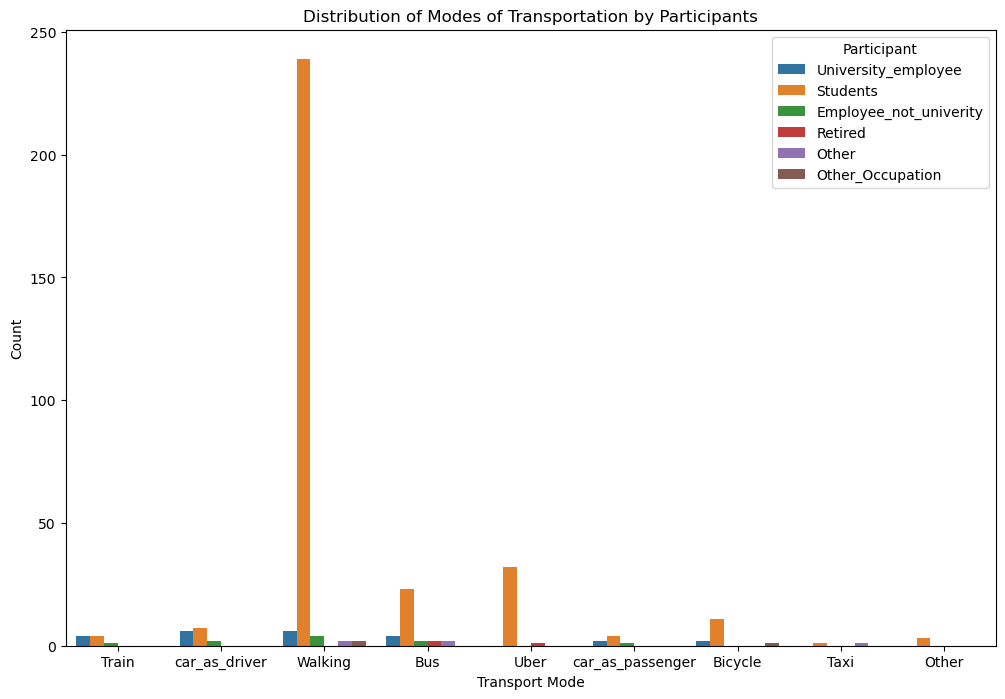

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Transport_Mode', hue='Participant')
plt.xlabel('Transport Mode')
plt.ylabel('Count')
plt.title('Distribution of Modes of Transportation by Participants')
plt.show()

The survey shows that students prefer walking, with buses, Uber, and cycling being more common. University employees mostly use cars, walking, trains, and buses, with taxis being the least used.

## STATISTICAL ANALYSIS: CHI-SQUARE TEST OF INDEPENDENCE

The chi-square test of independence is used for statistical analysis to determine the relationship between mode of transport and participants, as no assumptions were made.

## Data Preparation

Pandas was used to generate a new data frame 'df_modes_participants', containing both dependent and independent variables for statistical analysis of transport modes among participants.

In [41]:
modes_of_transport = ['car_as_driver', 'Bus', 'Train', 'car_as_passenger', 'Bicycle', 'Walking', 'Taxi', 'Uber', 'Other_Transport']
participants_columns = ['Students', 'University_employee', 'Employee_not_univerity', 'Retired', 'Other_Occupation']

df_modes_participants = df[modes_of_transport + participants_columns]

print(df_modes_participants.head())

   car_as_driver  Bus  Train  car_as_passenger  Bicycle  Walking  Taxi  Uber  \
2              0    0      1                 0        0        0     0     0   
3              1    0      1                 0        0        1     0     0   
4              0    0      0                 0        0        1     0     0   
5              0    0      1                 0        0        1     0     0   
6              0    0      0                 0        0        1     0     0   

  Other_Transport  Students  University_employee  Employee_not_univerity  \
2               0         0                    1                       0   
3               0         1                    0                       0   
4               0         1                    0                       0   
5               0         0                    0                       1   
6               0         1                    0                       0   

   Retired  Other_Occupation  
2        0                 0  


## Contingency Table

Create a contingency table using the 'pd.crosstab' function in pandas to explore the relationship between the categories of the 'df_modes_participants' data frame.

In [42]:
contingency_table = pd.crosstab(
    [df_modes_participants[col] for col in participants_columns],
    [df_modes_participants[col] for col in modes_of_transport]
)

print(contingency_table)

car_as_driver                                                                 0  \
Bus                                                                           0   
Train                                                                         0   
car_as_passenger                                                              0   
Bicycle                                                                       0   
Walking                                                                       0   
Taxi                                                                          0   
Uber                                                                          0   
Other_Transport                                                               0   
Students University_employee Employee_not_univerity Retired Other_Occupation      
0        0                   0                      0       0                 0   
                                                            1                 0   
    

## Hypothesis Testing (Chi-Square Test)

The 'chi2_contingency' function in'scipy.stats' is utilized to conduct a chi-square test on the contigency table, comparing the p-value to a 0.05 significance level.

In [43]:
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Compare p-value to significance level (e.g., 0.05)
if p < 0.05:
    print("Reject the null hypothesis. There is evidence of an association.")
else:
    print("Fail to reject the null hypothesis. There is no significant association.")

Chi-square statistic: 261.3957659511401
P-value: 1.0908918134415246e-12
Reject the null hypothesis. There is evidence of an association.


## INTERPRETATION OF RESULT

The chi-square statistic of 261.40 indicates a significant relationship between our variables, indicating that observed differences in frequencies are not random chance.

A p-value of 1.09e-12 which is less than 0.005 indicates that there is enough evidence to reject the null hypothesis

## CONCLUSION

The study shows there is a significant relationship between the choice of modes of transportation and occupation of the population suggesting that occupation influences choice of mode of transport. The findings align with earlier research on mobility pattern of students. The dataset quality, sample size, demographic variables, and geographic context all have an impact on the outcomes. 